# Seaborn

* matplotlib를 기반으로 다양한 색 테마, 차트 기능을 추가한 데이터 시각화 라이브러리
    - matplotlib : https://matplotlib.org/ 참조
* matplotlib에 없는 플롯(히트맵, 카운트플랏 등)을 제공
* 보다 자세한 사용법 및 예제 코드, 활용 갤러리 등은 https://seaborn.pydata.org/ 참조


## 특징

* 데이터셋 지향적인 API 제공
* 다양한 종류의 예제 데이터셋 제공
    - 제공하는 전체 데이터 보기 : https://github.com/mwaskom/seaborn-data
* 데이터 패턴 등을 분석하기 위한 편리한 뷰 기능 제공
* Linear Regression 모델의 시각화 제공
* color palettes 등의 도구 제공

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

In [6]:
penguins = sns.load_dataset("penguins")
flights = sns.load_dataset("flights")
titanic = sns.load_dataset("titanic")

## 산점도(Scatter Plot)

연속형 numeric 타입의 두 변수 간 관계를 scatter plot으로 표현

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


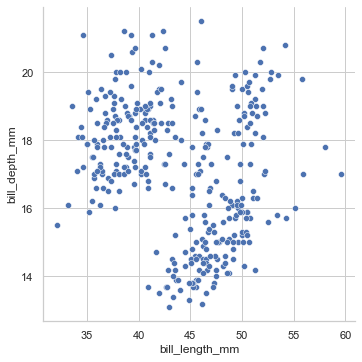

In [7]:
sns.relplot(x="bill_length_mm", y = "bill_depth_mm", data = penguins);

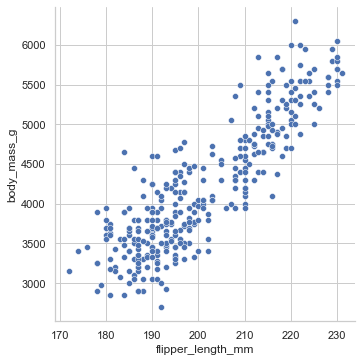

In [6]:
sns.relplot(x="flipper_length_mm",y="body_mass_g", data=penguins);

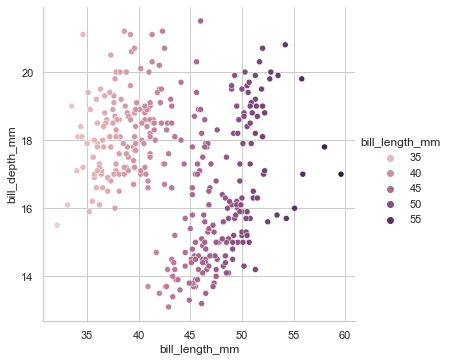

In [8]:
sns.relplot(x="bill_length_mm", y = "bill_depth_mm", 
            hue="bill_length_mm",
            data = penguins);

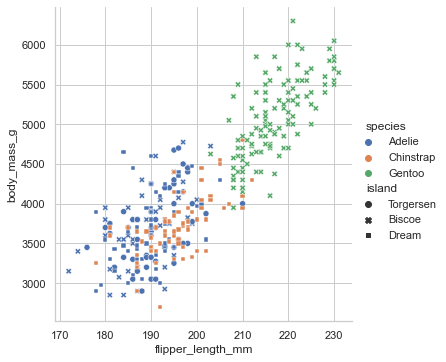

In [11]:
sns.relplot(x="flipper_length_mm",y="body_mass_g",
           hue='species', style="island", data=penguins); #색 -> 종, 모양 -> 섬 구분 

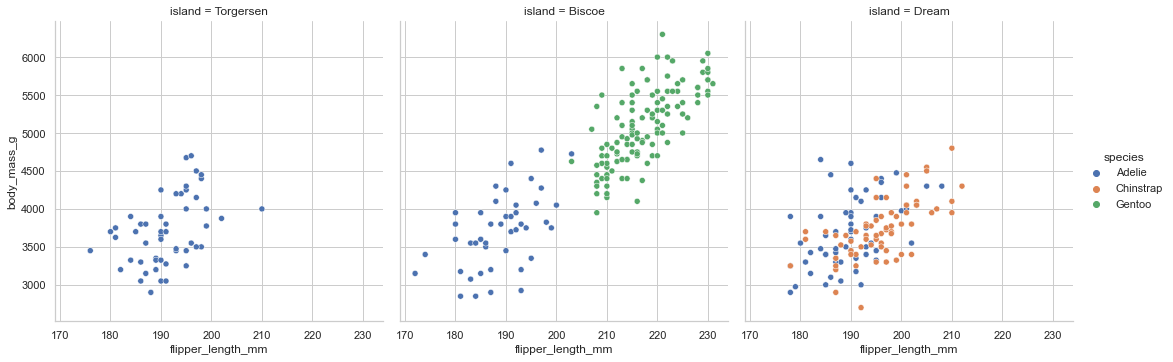

In [12]:
sns.relplot(x="flipper_length_mm",y="body_mass_g",
           hue='species', col="island", data=penguins);

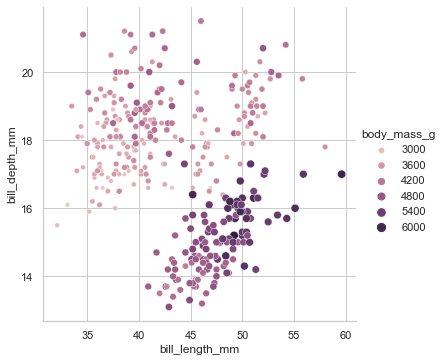

In [14]:
sns.relplot(x="bill_length_mm", y = "bill_depth_mm", 
            hue="body_mass_g", size='body_mass_g',
            data = penguins);

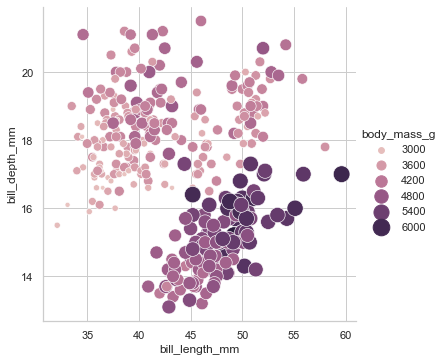

In [15]:
sns.relplot(x="bill_length_mm", y = "bill_depth_mm", 
            hue="body_mass_g", size='body_mass_g', sizes=(10,300),
            data = penguins);

## 라인 플롯(Line Plot)

시간의 흐름에 따른 데이터의 변화를 보려면 kind=“line” 인자 추가

In [16]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


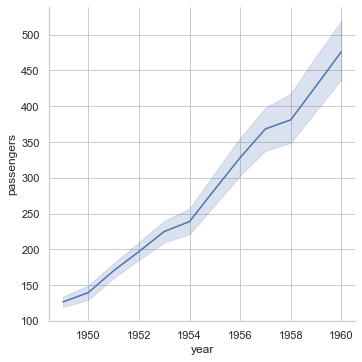

In [18]:
sns.relplot(x="year",y="passengers",kind="line",data=flights); #밴드의 형태 : 신뢰구간

## 범주형 산점도(Categorical scatterplots)

In [7]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


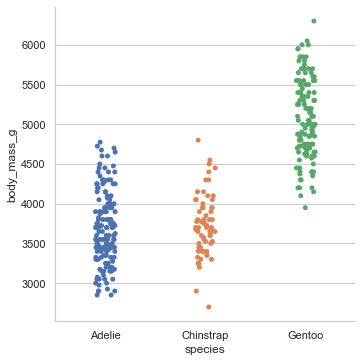

In [21]:
sns.catplot(x="species",y="body_mass_g",data=penguins);

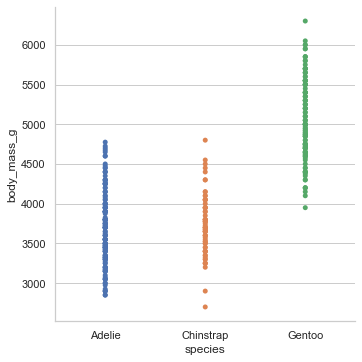

In [22]:
sns.catplot(x="species",y="body_mass_g",jitter=False, data=penguins);

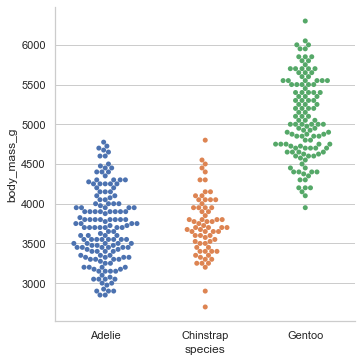

In [8]:
sns.catplot(x="species",y="body_mass_g", kind="swarm", data=penguins);

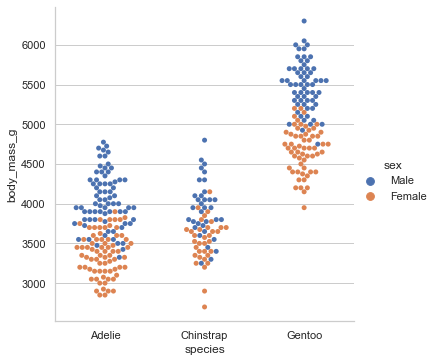

In [9]:
sns.catplot(x="species",y="body_mass_g", hue = "sex", kind="swarm", data=penguins);

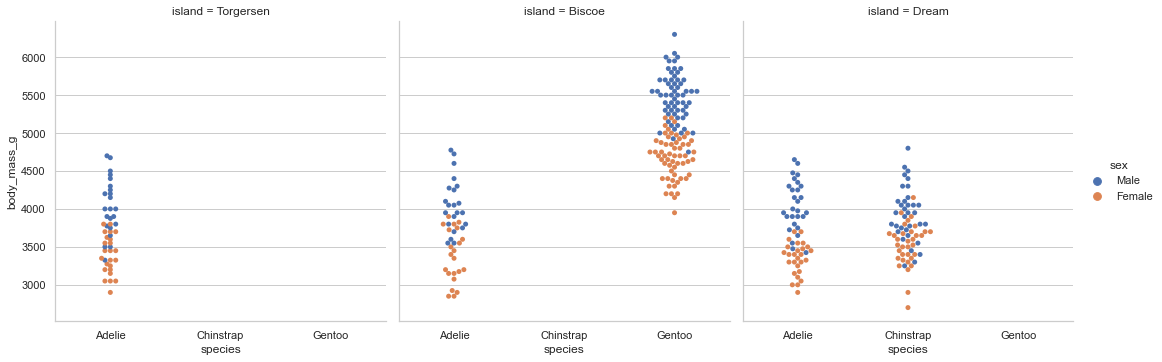

In [10]:
sns.catplot(x="species",y="body_mass_g", hue = "sex", col= "island", kind="swarm", data=penguins);

## 박스 플롯(Box plots)

사분위수(Quantile) 표시

극단치를 제외한 핵심 범주의 데이터 범위를 확인할 때

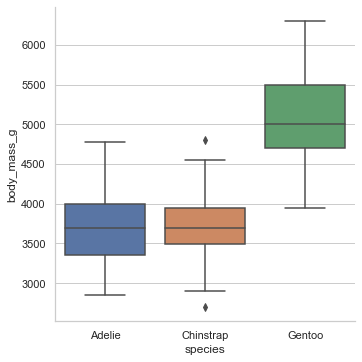

In [12]:
sns.catplot(x="species",y="body_mass_g",kind="box",data=penguins);

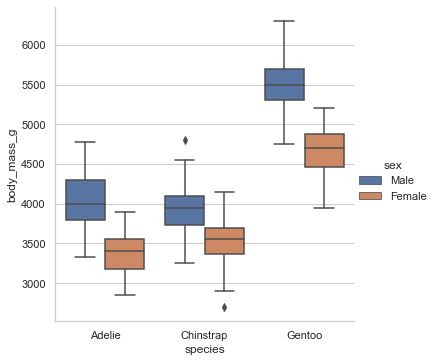

In [13]:
sns.catplot(x="species",y="body_mass_g",
            hue = "sex", kind="box",data=penguins);

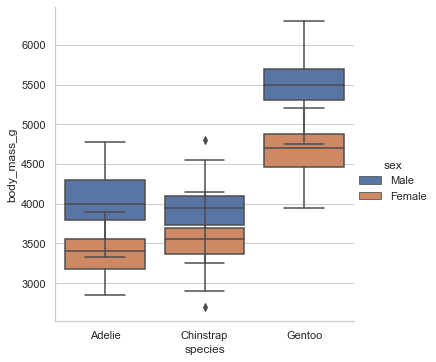

In [14]:
sns.catplot(x="species",y="body_mass_g",
            hue = "sex", kind="box", dodge = False, data=penguins);

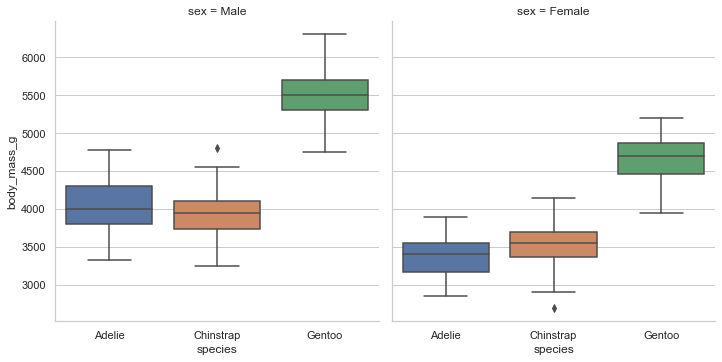

In [15]:
sns.catplot(x="species",y="body_mass_g",
            col = "sex", kind="box", data=penguins);

## 카운트 플롯(Count plots)

해당 column을 구성하고 있는 value들의 빈도

In [16]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


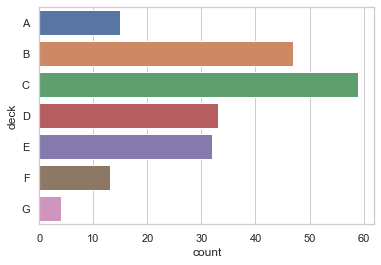

In [18]:
sns.countplot(y="deck", data= titanic);

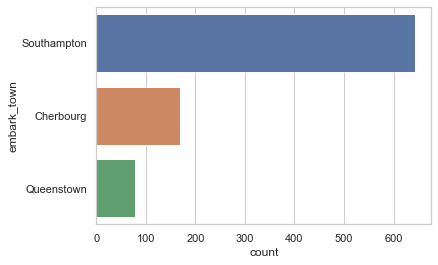

In [21]:
sns.countplot(y="embark_town", data= titanic);

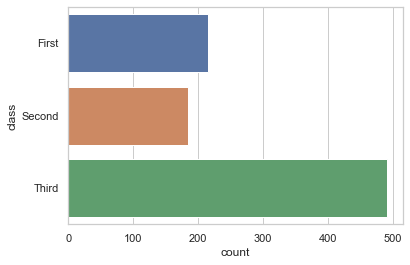

In [22]:
sns.countplot(y="class",data=titanic);

## 페어와이즈 관계 시각화(Visualizing pairwise relationships)

데이터셋의 모든 속성 변수의 쌍(pair)의 관계 플롯팅

In [23]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


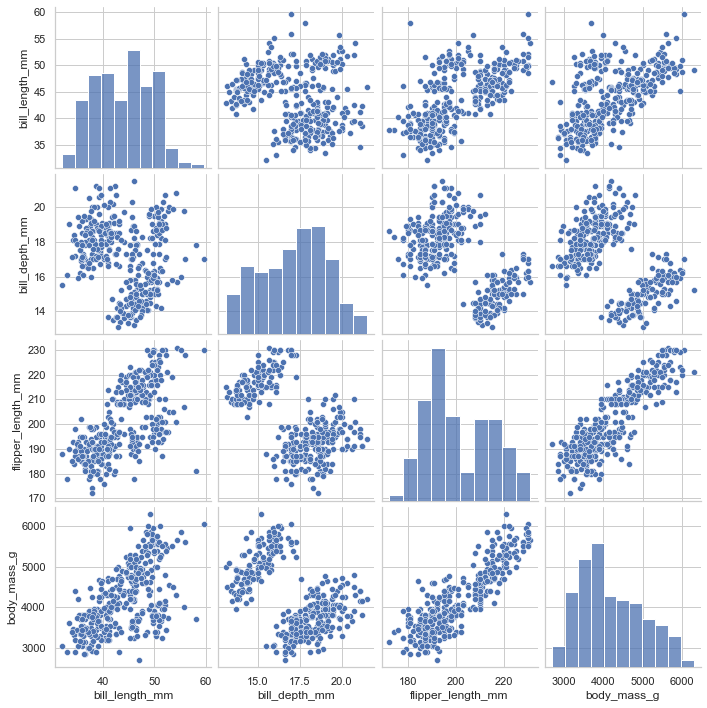

In [24]:
sns.pairplot(penguins);

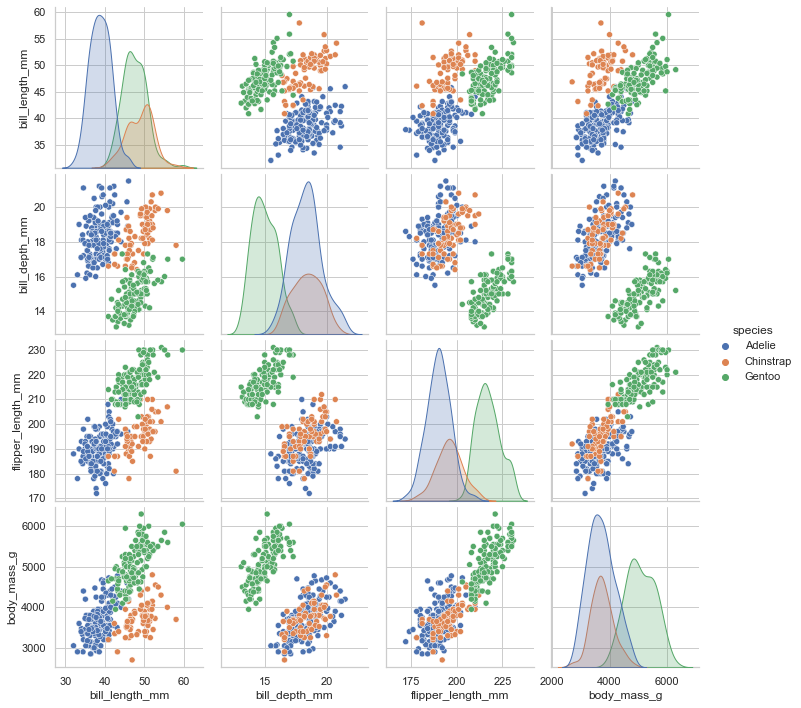

In [25]:
sns.pairplot(penguins, hue = "species");

## 히트맵

색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 열(heat) 분포(map) 형태의 그래픽으로 시각화

In [26]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [27]:
flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


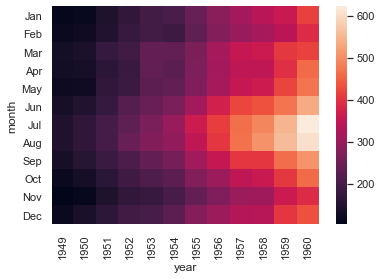

In [28]:
sns.heatmap(flights);

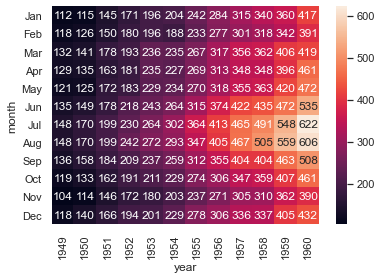

In [29]:
sns.heatmap(flights, annot=True, fmt="d");

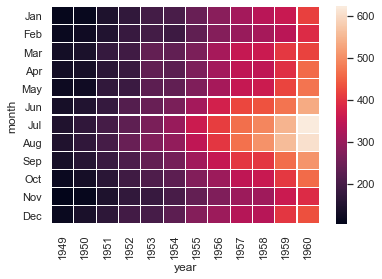

In [31]:
sns.heatmap(flights, linewidths=.2);

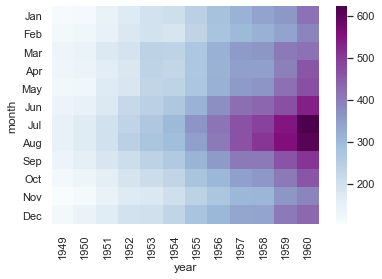

In [33]:
sns.heatmap(flights, cmap="BuPu");

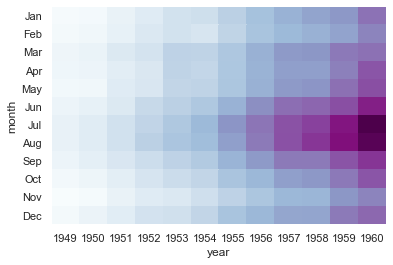

In [34]:
sns.heatmap(flights, cmap="BuPu", cbar=False);

## 선형 회귀(Linear Regression) 모델

두 연속형 데이터 간 선형 관계 모델(단순 선형 회귀 linear regression)

In [35]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


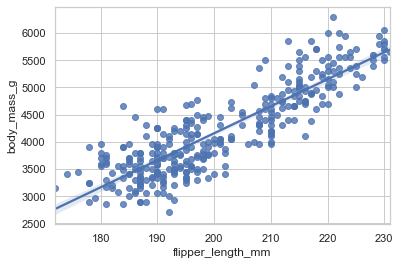

In [38]:
sns.regplot(x = "flipper_length_mm", y ="body_mass_g", data=penguins);

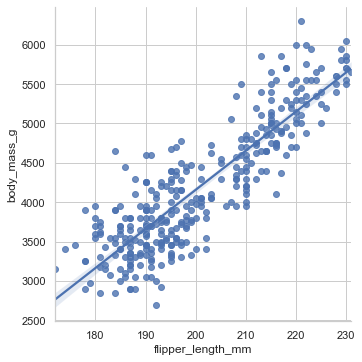

In [39]:
sns.lmplot(x = "flipper_length_mm", y ="body_mass_g", data=penguins);

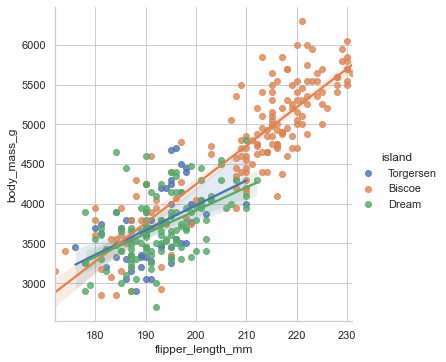

In [40]:
sns.lmplot(x = "flipper_length_mm", y ="body_mass_g", 
           hue = "island", data=penguins);

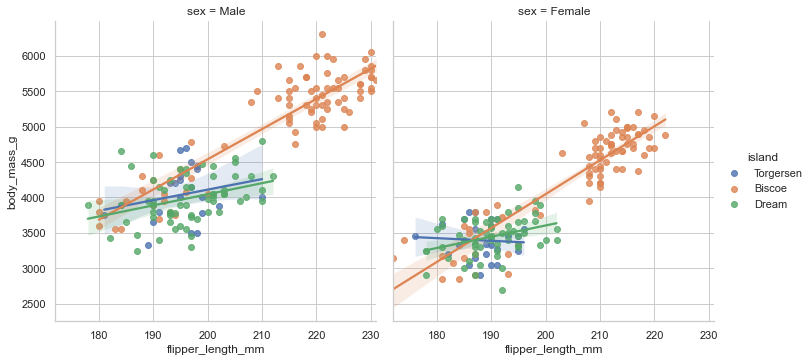

In [41]:
sns.lmplot(x = "flipper_length_mm", y ="body_mass_g", 
           col = "sex", hue = "island", data=penguins);

## 구조화된 다중 플롯 그리드, FacetGrid

In [42]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [43]:
sns.set(style = "ticks")

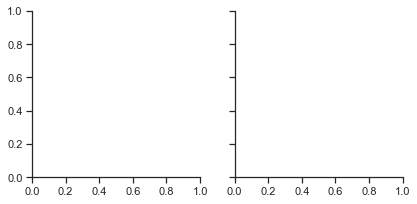

In [44]:
g = sns.FacetGrid(penguins, col = "sex")

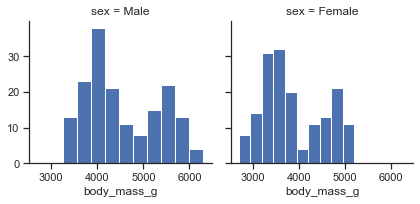

In [46]:
g.map(plt.hist, "body_mass_g");

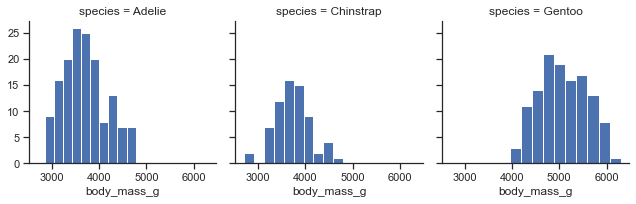

In [49]:
g = sns.FacetGrid(penguins, col = "species")
g.map(plt.hist, "body_mass_g");

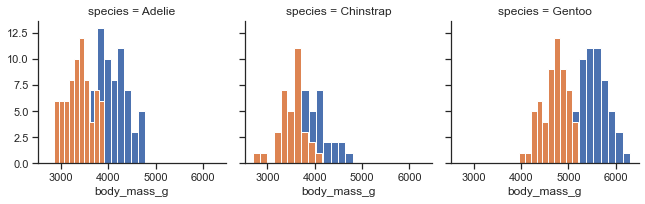

In [50]:
g = sns.FacetGrid(penguins, col = "species", hue = "sex")
g.map(plt.hist, "body_mass_g");

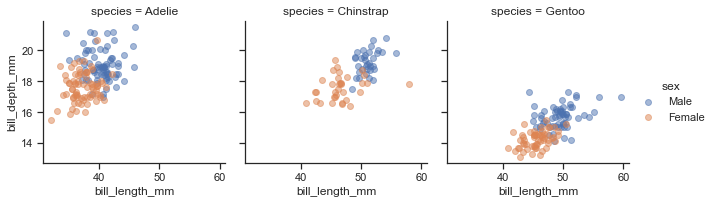

In [53]:
g = sns.FacetGrid(penguins, col = "species", hue = "sex")
g.map(plt.scatter, "bill_length_mm", "bill_depth_mm", alpha=.5);
g.add_legend();

## Seaborn 스타일

* There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks

In [57]:
def randplot(flip=1):
    for i in range(1,7):
        plt.plot(np.random.randn(50).cumsum());

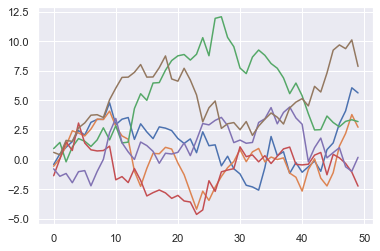

In [58]:
sns.set_style("darkgrid")
randplot()

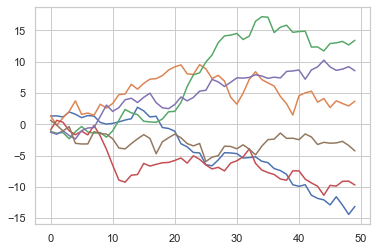

In [59]:
sns.set_style("whitegrid")
randplot()

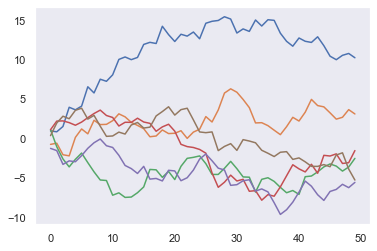

In [60]:
sns.set_style("dark")
randplot()

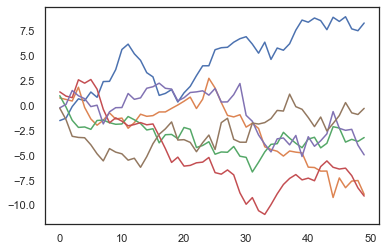

In [61]:
sns.set_style("white")
randplot()

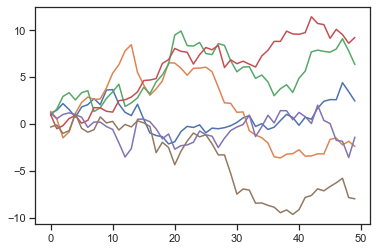

In [62]:
sns.set_style("ticks")
randplot()

## 기본 색상 표 설정

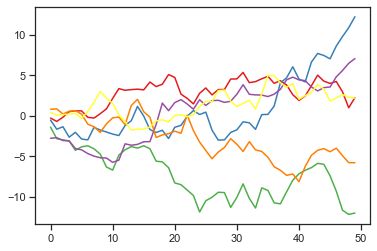

In [63]:
sns.set_palette("Set1")
randplot();

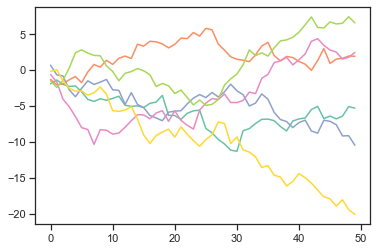

In [64]:
sns.set_palette("Set2")
randplot();

## 참고문헌

* Seaborn, https://seaborn.pydata.org/
* Igor Milovanovi, "Python Data Visualization Cookbook", Packt
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly